In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
%cd /content/drive/My Drive/Thesis/Models/BERT_QA

/content/drive/My Drive/Thesis/Models/BERT_QA


In [3]:
!pip install transformers

In [4]:
pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 5.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [5]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.4 MB/s eta 0:00:00


In [ ]:
pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.3 MB/s eta 0:00:00


In [8]:
import pandas as pd
df = pd.read_csv("/content/Q&A.csv")

In [ ]:
from datasets import load_dataset
squad = load_dataset("squad")
#squad = squad.train_test_split(test_size=0.2)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/87599 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10570 [00:00<?, ? examples/s]

In [ ]:
squad["train"]

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 87599
})

In [ ]:
data_dict = squad["train"].to_dict()
# Create a DataFrame from the dictionary
squad = pd.DataFrame.from_dict(data_dict)

In [ ]:
squad["answers"][0]

{'text': ['Saint Bernadette Soubirous'], 'answer_start': [515]}

In [ ]:
len(squad['id'].unique())

87599

In [2]:
df

,sentence,question,answer,context_index
0,"a healthy queen observed, workers are active, ...",is there a queen currently present in the hive?,healthy queen,0
1,"a healthy queen observed, workers are active, ...",are there any worker bees currently active in ...,workers are active,0
2,"a healthy queen observed, workers are active, ...",describe the queen's activity or presence note...,healthy queen,0
3,"a healthy queen observed, workers are active, ...",what types of forage bees have been foraging?,pollen collected,0
4,"a healthy queen observed, workers are active, ...",what types of bee products have been collected...,honey frames filled,0
...,...,...,...,...
3406,"queen not detected, workers disoriented, low d...",can you list the bee products available from t...,honey frames,270
3407,"queen not detected, workers disoriented, low d...",how many honey frames are currently filled in ...,three honey frames underutilized,270
3408,"queen not detected, workers disoriented, low d...",can you estimate how many frames are ready for...,three honey frames underutilized,270
3409,"queen not detected, workers disoriented, low d...",what is the current health status of the hive?,queen not detected,270


In [ ]:
squad.head()

,id,title,context,question,answers
0,5733be284776f41900661182,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,"{'text': ['Saint Bernadette Soubirous'], 'answ..."
1,5733be284776f4190066117f,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,"{'text': ['a copper statue of Christ'], 'answe..."
2,5733be284776f41900661180,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,"{'text': ['the Main Building'], 'answer_start'..."
3,5733be284776f41900661181,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,{'text': ['a Marian place of prayer and reflec...
4,5733be284776f4190066117e,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,{'text': ['a golden statue of the Virgin Mary'...


In [9]:
df_copy = df

In [10]:
len(df_copy['sentence'].unique())

271

In [11]:

from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42, shuffle=True)
valid_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, shuffle=True)

In [12]:
test_df

,sentence,question,answer,context_index
2749,"queen absent, disorganized workers, minimal dr...",what is the status of workers in the hive?,disorganized workers,217
538,"queen excellent, brood numerous, forage plenti...",what is the current health status of the hive?,queen excellent,43
3103,"new queen, workers adapting, increasing drone ...",are there any worker bees currently active in ...,workers adapting,246
1055,"queen missing, workers slow, drones barely pre...",how many honey frames are currently filled in ...,three frames with minimal honey,84
1117,"queen unseen, workers managing, drones limited...",what is the egg count of the hive?,eggs sporadic,89
...,...,...,...,...
840,"queen newly mated, worker bees thriving, drone...",describe the queen's activity or presence note...,queen newly mated,68
2596,"queen missing, sluggish workers, scant drones,...",how many honey frames are currently filled in ...,five honey frames only half filled,205
1221,"queen aging, workers maintaining, drones spars...",what is the egg count of the hive?,egg laying reduced,97
2420,"queen efficient, busy workers, good drone acti...",how many honey frames are currently filled in ...,eight frames ready for harvest,191


In [14]:
train = df[:1705]
test = df[1705:2561]
validate =df[2561:]

In [15]:
test

,sentence,question,answer,context_index
1705,"queen present, worker bees excelling, drone co...",is there a queen currently present in the hive?,queen present,135
1706,"queen present, worker bees excelling, drone co...",are there any worker bees currently active in ...,worker bees excelling,135
1707,"queen present, worker bees excelling, drone co...",describe the queen's activity or presence note...,queen present,135
1708,"queen present, worker bees excelling, drone co...",what is the status of drones in the hive?,drone count optimal,135
1709,"queen present, worker bees excelling, drone co...",what types of bee products have been collected...,all frames teeming with honey,135
...,...,...,...,...
2556,"queen aging, workers steady, limited drone act...",can you list the bee products available from t...,eight honey frames nearly filled,202
2557,"queen aging, workers steady, limited drone act...",how many honey frames are currently filled in ...,eight honey frames nearly filled,202
2558,"queen aging, workers steady, limited drone act...",can you estimate how many frames are ready for...,eight honey frames nearly filled,202
2559,"queen aging, workers steady, limited drone act...",what is the current health status of the hive?,queen aging,202


In [28]:
def transform_data_with_id(df):
    result = []

    grouped = df.groupby('context_index')

    for context_id, group in grouped:
        context = group.iloc[0]['sentence']  # Assuming all sentences in the group are the same
        qas = []
        for _, row in group.iterrows():
            answer_start = context.find(row['answer'])
            qa = {
                'id': f"{len(qas) + 1:05d}",
                'is_impossible': False,
                'question': row['question'],
                'answers': [{
                    'text': row['answer'],
                    'answer_start': answer_start
                }]
            }
            qas.append(qa)

        result.append({
            'context': context,
            'qas': qas
        })

    return result

In [17]:
train_copy = transform_data_with_id(train_df)
test_copy = transform_data_with_id(test_df)
valid_copy = transform_data_with_id(valid_df)

In [18]:
train_copy

[{'context': 'a healthy queen observed, workers are active, abundant nectar and pollen collected, with a full count of eggs and six honey frames filled',
  'qas': [{'id': '00001',
    'is_impossible': False,
    'question': 'what is the status of workers in the hive?',
    'answers': [{'text': 'workers are active', 'answer_start': 26}]},
   {'id': '00002',
    'is_impossible': False,
    'question': 'can you list the bee products available from the latest harvest?',
    'answers': [{'text': 'honey frames filled', 'answer_start': 118}]},
   {'id': '00003',
    'is_impossible': False,
    'question': 'what is the egg count of the hive?',
    'answers': [{'text': 'full count of eggs', 'answer_start': 91}]},
   {'id': '00004',
    'is_impossible': False,
    'question': "describe the queen's activity or presence noted in the recent observations?",
    'answers': [{'text': 'healthy queen', 'answer_start': 2}]},
   {'id': '00005',
    'is_impossible': False,
    'question': 'how many honey f

In [19]:
flat_data = []
for entry in train_copy:
    context = entry['context']
    for qa in entry['qas']:
        flat_entry = {
            'context': context,
            'id': qa['id'],
            'is_impossible': qa['is_impossible'],
            'question': qa['question'],
            'answers':   qa['answers']
        }
        flat_data.append(flat_entry)

train_transformed = pd.DataFrame(flat_data)

In [20]:
train_transformed

,context,id,is_impossible,question,answers
0,"a healthy queen observed, workers are active, ...",00001,False,what is the status of workers in the hive?,"[{'text': 'workers are active', 'answer_start'..."
1,"a healthy queen observed, workers are active, ...",00002,False,can you list the bee products available from t...,"[{'text': 'honey frames filled', 'answer_start..."
2,"a healthy queen observed, workers are active, ...",00003,False,what is the egg count of the hive?,"[{'text': 'full count of eggs', 'answer_start'..."
3,"a healthy queen observed, workers are active, ...",00004,False,describe the queen's activity or presence note...,"[{'text': 'healthy queen', 'answer_start': 2}]"
4,"a healthy queen observed, workers are active, ...",00005,False,how many honey frames are currently filled in ...,"[{'text': 'six honey frames filled', 'answer_s..."
...,...,...,...,...,...
2382,"queen not detected, workers disoriented, low d...",00003,False,are there any worker bees currently active in ...,"[{'text': 'workers disoriented', 'answer_start..."
2383,"queen not detected, workers disoriented, low d...",00004,False,can you estimate how many frames are ready for...,"[{'text': 'three honey frames underutilized', ..."
2384,"queen not detected, workers disoriented, low d...",00005,False,what types of bee products have been collected...,"[{'text': 'honey frames', 'answer_start': 88}]"
2385,"queen not detected, workers disoriented, low d...",00006,False,how many honey frames are currently filled in ...,"[{'text': 'three honey frames underutilized', ..."


In [21]:
flat_data = []
for entry in valid_copy:
    context = entry['context']
    for qa in entry['qas']:
        flat_entry = {
            'context': context,
            'id': qa['id'],
            'is_impossible': qa['is_impossible'],
            'question': qa['question'],
            'answers':   qa['answers']
        }
        flat_data.append(flat_entry)

valid_transformed = pd.DataFrame(flat_data)

In [22]:
valid_transformed

,context,id,is_impossible,question,answers
0,"a healthy queen observed, workers are active, ...",00001,False,is there a queen currently present in the hive?,"[{'text': 'healthy queen', 'answer_start': 2}]"
1,"a healthy queen observed, workers are active, ...",00002,False,what is the current health status of the hive?,"[{'text': 'healthy queen', 'answer_start': 2}]"
2,"a healthy queen observed, workers are active, ...",00003,False,what is the status of the queen in the hive?,"[{'text': 'healthy queen', 'answer_start': 2}]"
3,"queenright with an extensive brood pattern, wo...",00001,False,what is the current health status of the hive?,"[{'text': 'queenright', 'answer_start': 0}]"
4,"queenright with an extensive brood pattern, wo...",00002,False,can you estimate how many frames are ready for...,[{'text': 'seven honey frames are heavy with p...
...,...,...,...,...,...
507,"queen absent, disorganized workers, scarce dro...",00001,False,what is the egg count of the hive?,"[{'text': 'few eggs', 'answer_start': 51}]"
508,"queen not detected, workers disoriented, low d...",00001,False,what is the status of the queen in the hive?,"[{'text': 'queen not detected', 'answer_start'..."
509,"queen not detected, workers disoriented, low d...",00002,False,describe the queen's activity or presence note...,"[{'text': 'queen not detected', 'answer_start'..."
510,"queen not detected, workers disoriented, low d...",00003,False,what is the current health status of the hive?,"[{'text': 'queen not detected', 'answer_start'..."


In [23]:
flat_data = []
for entry in test_copy:
    context = entry['context']
    for qa in entry['qas']:
        flat_entry = {
            'context': context,
            'id': qa['id'],
            'is_impossible': qa['is_impossible'],
            'question': qa['question'],
            'answers':   qa['answers']
        }
        flat_data.append(flat_entry)

test_transformed = pd.DataFrame(flat_data)

In [ ]:
test_transformed

,context,id,is_impossible,question,answers
0,"queenright with an extensive brood pattern, wo...",00001,False,what types of forage bees have been foraging?,[{'text': 'workers exhibit high foraging behav...
1,"queenright with an extensive brood pattern, wo...",00002,False,is there a queen currently present in the hive?,"[{'text': 'queenright', 'answer_start': 0}]"
2,"queenright with an extensive brood pattern, wo...",00003,False,can you list the bee products available from t...,[{'text': 'honey frames are heavy with product...
3,"queen’s presence confirmed, strong brood devel...",00001,False,what types of bee products have been collected...,"[{'text': 'all ten honey frames being filled',..."
4,"queen is laying well, the worker population is...",00001,False,are there any worker bees currently active in ...,"[{'text': 'beeswax levels are sufficient', 'an..."
...,...,...,...,...,...
507,"queen absent, disorganized workers, scarce dro...",00001,False,what's the egg production like?,"[{'text': 'few eggs', 'answer_start': 51}]"
508,"queen absent, disorganized workers, scarce dro...",00002,False,what is the status of drones in the hive?,"[{'text': 'scarce drones', 'answer_start': 36}]"
509,"queen absent, disorganized workers, scarce dro...",00003,False,how many honey frames are currently filled in ...,"[{'text': 'seven honey frames poorly stocked',..."
510,"queen not detected, workers disoriented, low d...",00001,False,is there a queen currently present in the hive?,"[{'text': 'queen not detected', 'answer_start'..."


In [29]:
def transform_answers(answer_list):
    return {
        'text': [ans['text'] for ans in answer_list],
        'answer_start': [ans['answer_start'] for ans in answer_list]
    }

In [30]:
train_transformed['answers'] = train_transformed['answers'].apply(transform_answers)
valid_transformed['answers'] = valid_transformed['answers'].apply(transform_answers)
test_transformed['answers'] = test_transformed['answers'].apply(transform_answers)

In [ ]:
test_transformed

,context,id,is_impossible,question,answers
0,"queenright with an extensive brood pattern, wo...",00001,False,what types of forage bees have been foraging?,{'text': ['workers exhibit high foraging behav...
1,"queenright with an extensive brood pattern, wo...",00002,False,is there a queen currently present in the hive?,"{'text': ['queenright'], 'answer_start': [0]}"
2,"queenright with an extensive brood pattern, wo...",00003,False,can you list the bee products available from t...,{'text': ['honey frames are heavy with product...
3,"queen’s presence confirmed, strong brood devel...",00001,False,what types of bee products have been collected...,{'text': ['all ten honey frames being filled']...
4,"queen is laying well, the worker population is...",00001,False,are there any worker bees currently active in ...,"{'text': ['beeswax levels are sufficient'], 'a..."
...,...,...,...,...,...
507,"queen absent, disorganized workers, scarce dro...",00001,False,what's the egg production like?,"{'text': ['few eggs'], 'answer_start': [51]}"
508,"queen absent, disorganized workers, scarce dro...",00002,False,what is the status of drones in the hive?,"{'text': ['scarce drones'], 'answer_start': [36]}"
509,"queen absent, disorganized workers, scarce dro...",00003,False,how many honey frames are currently filled in ...,{'text': ['seven honey frames poorly stocked']...
510,"queen not detected, workers disoriented, low d...",00001,False,is there a queen currently present in the hive?,"{'text': ['queen not detected'], 'answer_start..."


In [ ]:
test_transformed['question'][507]

"what's the egg production like?"

In [ ]:
test_transformed['context'][507]

'queen absent, disorganized workers, scarce drones, few eggs laid, and seven honey frames poorly stocked'

In [60]:
def data_preparing(df):

    from transformers import AutoTokenizer
    tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

    questions = [q.strip() for q in df["question"]]
    context = [q.strip() for q in df["context"]]
    inputs = tokenizer(
            questions,
            context,
            max_length=384,
            truncation="only_second",
            return_offsets_mapping=True,
            padding="max_length",
        )

    offset_mapping = inputs.pop("offset_mapping")

    start_positions = []
    end_positions = []
    answers = df['answers']
    for i, offset in enumerate(offset_mapping):
        answer = answers[i]
        start_char = answer["answer_start"][0]
        end_char = answer["answer_start"][0] + len(answer["text"][0])
        sequence_ids = inputs.sequence_ids(i)

        # Find the start and end of the context
        idx = 0
        while sequence_ids[idx] != 1:
            idx += 1
        context_start = idx
        while sequence_ids[idx] == 1:
            idx += 1
        context_end = idx - 1

        # If the answer is not fully inside the context, label it (0, 0)
        if offset[context_start][0] > end_char or offset[context_end][1] < start_char:
            start_positions.append(0)
            end_positions.append(0)
        else:
            # Otherwise it's the start and end token positions
            idx = context_start
            while idx <= context_end and offset[idx][0] <= start_char:
                idx += 1
            start_positions.append(idx - 1)

            idx = context_end
            while idx >= context_start and offset[idx][1] >= end_char:
                idx -= 1
            end_positions.append(idx + 1)

    df["start_positions"] = start_positions
    df["end_positions"] = end_positions

    import pandas as pd
    from datasets import Dataset
    data = {'input_ids': inputs['input_ids'],
            'attention_mask': inputs['attention_mask'],
            'start_positions':start_positions,
            'end_positions': end_positions,
          }
    df = pd.DataFrame(data)
    #df.to_csv('encoding_train.csv',index=False)
    df = Dataset.from_pandas(df)

    return df


In [61]:
train_prepared = data_preparing(train_transformed)
test_prepared = data_preparing(test_transformed)
valid_prepared = data_preparing(valid_transformed)

In [33]:
from huggingface_hub import notebook_login
notebook_login()

In [62]:
from datasets import load_metric

# Load the accuracy metric
accuracy_metric = load_metric("accuracy")

def compute_metrics(pred):
    logits = pred.predictions
    start_logits, end_logits = logits
    start_preds = start_logits.argmax(-1)
    end_preds = end_logits.argmax(-1)

    # You need to extract the actual start and end labels
    start_labels = pred.label_ids[0]
    end_labels = pred.label_ids[1]

    # Compute the accuracy for start and end positions
    start_acc = accuracy_metric.compute(predictions=start_preds, references=start_labels)
    end_acc = accuracy_metric.compute(predictions=end_preds, references=end_labels)

    # You can average the two accuracy scores for a final metric or report both
    final_acc = (start_acc['accuracy'] + end_acc['accuracy']) / 2

    return {
        'start_accuracy': start_acc['accuracy'],
        'end_accuracy': end_acc['accuracy'],
        'accuracy': final_acc
    }

/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [63]:
from transformers import AutoModelForQuestionAnswering, TrainingArguments, Trainer
model = AutoModelForQuestionAnswering.from_pretrained("bert-base-cased")
from transformers import AutoTokenizer
from transformers import DefaultDataCollator
from transformers import EarlyStoppingCallback


tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")


data_collator = DefaultDataCollator()

training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/Thesis/Models/BERT_QA",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=8,
    weight_decay=0.01,
    push_to_hub=True,
    logging_dir='./logs',
    logging_steps = 10,
    load_best_model_at_end=True
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_prepared,
    eval_dataset=valid_prepared,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics

)

trainer.train()


Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Start Accuracy,End Accuracy,Accuracy
1,0.234200,0.306061,0.927734,0.917969,0.922852
2,0.189600,0.151088,0.958984,0.947266,0.953125
3,0.088800,0.108869,0.968750,0.955078,0.961914
4,0.049300,0.091086,0.980469,0.962891,0.971680
5,0.059800,0.074304,0.982422,0.974609,0.978516
6,0.036000,0.077098,0.988281,0.982422,0.985352
7,0.022300,0.070742,0.990234,0.982422,0.986328
8,0.026700,0.067608,0.988281,0.982422,0.985352


TrainOutput(global_step=600, training_loss=0.2695550537792345, metrics={'train_runtime': 1475.9385, 'train_samples_per_second': 12.938, 'train_steps_per_second': 0.407, 'total_flos': 3742292149972992.0, 'train_loss': 0.2695550537792345, 'epoch': 8.0})

In [64]:
output = []
context_dict = {}

for index, row in test_df.iterrows():
    context = row['sentence']
    question = row['question']
    answer = row['answer']

    if context not in context_dict:
        context_dict[context] = {'context': context, 'questions': []}

    context_dict[context]['questions'].append({'question': question, 'answer': answer})

output = list(context_dict.values())

# Display the transformed data
print(output)

[{'context': 'queen absent, disorganized workers, minimal drones, scarce eggs, and six frames underdeveloped', 'questions': [{'question': 'what is the status of workers in the hive?', 'answer': 'disorganized workers'}, {'question': 'how many honey frames are currently filled in the hive?', 'answer': 'six frames underdeveloped'}]}, {'context': 'queen excellent, brood numerous, forage plentiful, eight honey frames topped', 'questions': [{'question': 'what is the current health status of the hive?', 'answer': 'queen excellent'}, {'question': 'describe the foraging behavior observed in the worker bees lately?', 'answer': 'forage plentiful'}, {'question': 'what is the status of the queen in the hive?', 'answer': 'queen excellent'}, {'question': "describe the queen's activity or presence noted in the recent observations?", 'answer': 'queen excellent'}]}, {'context': 'new queen, workers adapting, increasing drone presence, eggs starting to populate, and seven honey frames capped', 'questions'

In [71]:
len(output)

241

In [54]:
certainty_threshold = 0.15

In [68]:
def create_pipeline(model):
  return pipeline(
      "question-answering",
      model=model,
      tokenizer=model
  )

In [69]:
def generate_answers(pipeline, questions, context):
    global certainty_threshold
    score = 0
    correct_predictions = 0
    wrong_predictions = 0
    redundant_predictions = 0

    for obj in questions:
        question = obj['question']
        actual_answer = obj['answer']
        prediction = ''
        print("Question: ", question)

        result = pipeline(question=question, context=context)
        prediction = result['answer']
        confidence = result['score']

        print("Prediction: ", prediction, "Result Score: ", confidence, '\t|\t', "Answer: ", actual_answer)
        score += confidence

        # Check if the prediction is correct, wrong, or redundant
        if prediction.strip().lower() in actual_answer.strip().lower():
            correct_predictions += 1
        elif confidence < certainty_threshold:
            redundant_predictions += 1
        else:
            wrong_predictions += 1

    return score, correct_predictions, wrong_predictions, redundant_predictions


In [72]:
from transformers import pipeline

model_path = "/content/drive/MyDrive/Thesis/Models/BERT_QA"

# Load the model
bert_model = AutoModelForQuestionAnswering.from_pretrained(model_path)

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_path)

models = [
  bert_model,
]

pipelines = []

for model in models:
    print(model)
    pipelines.append(pipeline('question-answering', model=model,  tokenizer=tokenizer))

for ind, ppl in enumerate(pipelines):
    print('\n----------------')
    print(models[ind])
    print('----------------\n')
    total_score = 0
    total_correct_predictions = 0
    total_wrong_predictions = 0
    total_redundant_predictions = 0
    total_questions = 0

    for data in output:
        print('')
        print("Sentence: ", data['context'])
        score, correct_predictions, wrong_predictions, redundant_predictions = generate_answers(ppl, data['questions'], data['context'])
        total_score += score
        total_correct_predictions += correct_predictions
        total_wrong_predictions += wrong_predictions
        total_redundant_predictions += redundant_predictions
        total_questions += len(data['questions'])

    accuracy = total_correct_predictions / total_questions
    print('\n----------------')
    print(f'Score: {total_score}')
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(f'Correct Answers: {total_correct_predictions / total_questions * 100:.2f}%')
    print(f'Wrong Answers: {total_wrong_predictions / total_questions * 100:.2f}%')
    print(f'Redundant Answers: {total_redundant_predictions / total_questions * 100:.2f}%')
    print('----------------\n')


BertForQuestionAnswering(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, 

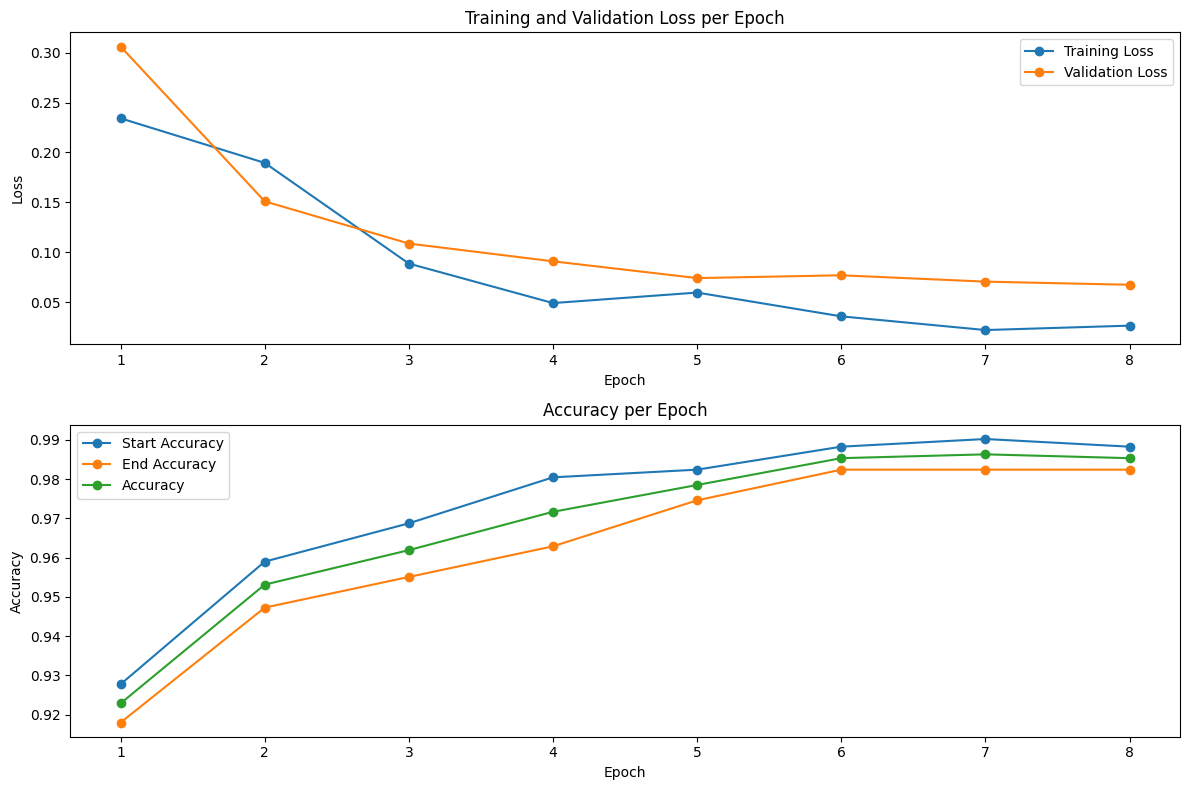

In [73]:
import matplotlib.pyplot as plt

# Data from the image
epochs = list(range(1, 9))
training_loss = [0.234200, 0.189600, 0.088800, 0.049300, 0.059800, 0.036000, 0.022300, 0.026700]
validation_loss = [0.306061, 0.151088, 0.108869, 0.091086, 0.074304, 0.077098, 0.070742, 0.067608]
start_accuracy = [0.927734, 0.958984, 0.968750, 0.980469, 0.982422, 0.988281, 0.990234, 0.988281]
end_accuracy = [0.917969, 0.947266, 0.955078, 0.962891, 0.974609, 0.982422, 0.982422, 0.982422]
accuracy = [0.922852, 0.953125, 0.961914, 0.971680, 0.978516, 0.985352, 0.986328, 0.985352]

# Plotting the data
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(epochs, training_loss, label='Training Loss', marker='o')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss per Epoch')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, start_accuracy, label='Start Accuracy', marker='o')
plt.plot(epochs, end_accuracy, label='End Accuracy', marker='o')
plt.plot(epochs, accuracy, label='Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()

plt.tight_layout()
plt.show()
